In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# load data from csv
data = pd.read_csv("glass.csv")
data = data.drop(columns=['idno'])

# separate independent and dependent variables
X = data.drop(columns=['type'])
y = data['type']

# standardize data for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

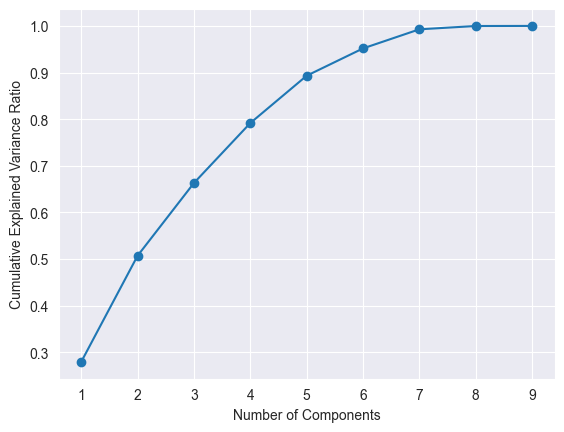

In [54]:
#  Principal Component Analysis
pca = PCA()
pca.fit(X_scaled)

# cumulative explained  variance
cum_vr = np.cumsum(pca.explained_variance_ratio_)

# x-axis
nums = np.arange(1, len(cum_vr)  + 1)

# plot cumulative variance
plt.plot(nums, cum_vr, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

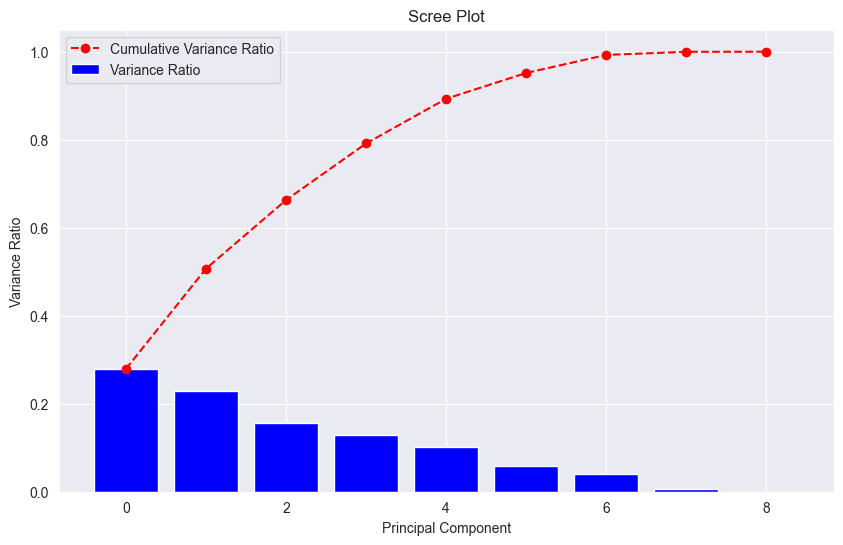

In [47]:
# analyze result
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()
scree_plot(pca)

In [55]:
# Classifying with all attributes using random forest

# split data into training and testing
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# random forest classifier for all attributes
rfc_full = RandomForestClassifier(random_state=42)
rfc_full.fit(X_train_full, y_train)
y_pred_full = rfc_full.predict(X_test_full)

# Evaluate model using metrics
print(f"\nEvaluating model with all attributes:")
print("Accuracy:",  accuracy_score(y_test, y_pred_full))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_full))

#8-fold cross validation
cv_scores = cross_val_score(rfc_full, X_scaled, y, cv=8)
print(f"\n8-fold CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")



Evaluating model with all attributes:
Accuracy: 0.8372093023255814

Classification Report:
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43


8-fold CV Accuracy: 0.7334 (+/- 0.0547)


In [56]:
# Classifying with PCA attributes

# apply PCA with 6 (minimum) components
pca_classifier = PCA(n_components=6)
X_pca = pca_classifier.fit_transform(X_scaled)

# split into training and testing
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# train random forest classifier
rfc_pca = RandomForestClassifier(random_state=42)
rfc_pca.fit(X_train_reduced, y_train_reduced)
y_pred_pca = rfc_pca.predict(X_test_reduced)

# Evaluate model using metrics
print(f"\nEvaluating model with PCA:")
print("Accuracy:",  accuracy_score(y_test_reduced, y_pred_pca))
print("\nClassification Report:")
print(classification_report(y_test_reduced, y_pred_pca))

#8-fold cross validation
cv_scores = cross_val_score(rfc_pca, X_pca, y, cv=8)
print(f"\n8-fold CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")



Evaluating model with PCA:
Accuracy: 0.6976744186046512

Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.73      0.64        11
           2       0.69      0.64      0.67        14
           3       0.50      0.33      0.40         3
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.70        43
   macro avg       0.76      0.65      0.68        43
weighted avg       0.72      0.70      0.69        43


8-fold CV Accuracy: 0.6259 (+/- 0.0660)
